<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-07 13:44:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: 'survey-data.csv'

     0K .......... .......... .......... .......... ..........  0% 36.1K 71m49s
    50K .......... .......... .......... .......... ..........  0%  120K 46m44s
   100K .......... .......... .......... .......... ..........  0%  334K 33m44s
   150K .......... .......... .......... .......... ..........  0%  374K 27m1s
   200K .......... .......... .......... .......... ..........  0%  754K 22m18s
   250K .......... .......... .......... 

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
#!pip install pandas 
#!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

pd.set_option('display.max_columns', None)
# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)  # 'main' : name of table


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


# sqlite_master: A special table in SQLite that stores metadata about the database schema—like tables, indexes, views, and triggers.

# name: A column in sqlite_master that stores the name of the objects (tables, indexes, views, etc.) in the database.

,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])

conn.close()

# df.iat[0,0]:

# Zero-based Indexing: The first row and first column are accessed with [0,0].
# Faster than loc or iloc when accessing a single element.
# .iat[] only works for single-value access. Trying to use slicing or providing a list will raise an error.


# sqlite_master:

# sqlite_master: A special table in SQLite that stores metadata about the database schema—like tables, indexes, views, and triggers.
# sql: A column in sqlite_master that contains the SQL statement used to create the table or object.

CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


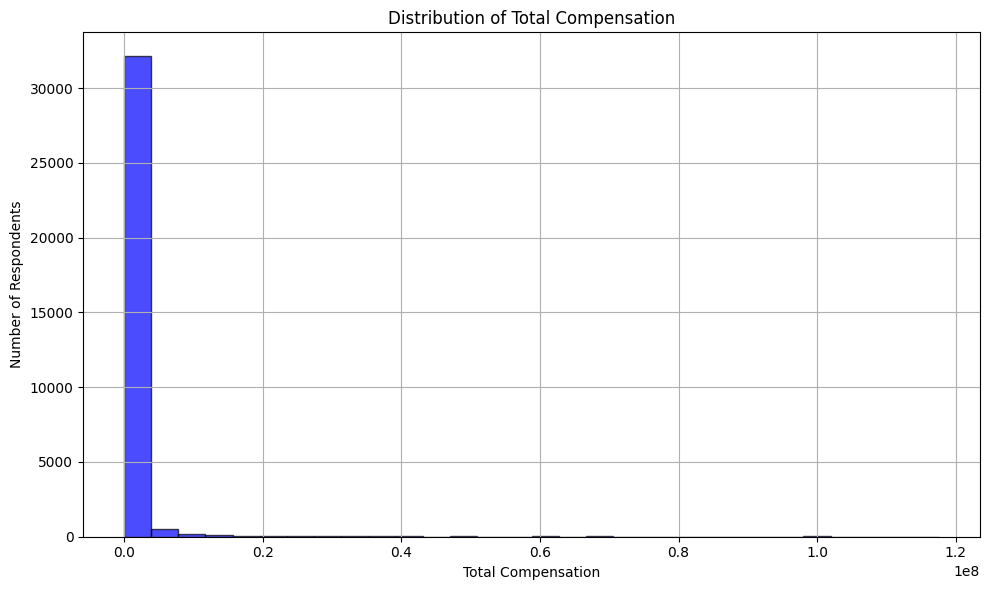

In [17]:
conn = sqlite3.connect('survey-data.sqlite')

QUERY = """
SELECT CompTotal from main
WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Optional: Remove outliers or extremely high values for better visualization  
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]  # Trim top 1% outliers

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()

# Close the connection
conn.close()

**Box Plots**

Plot a box plot of Age.


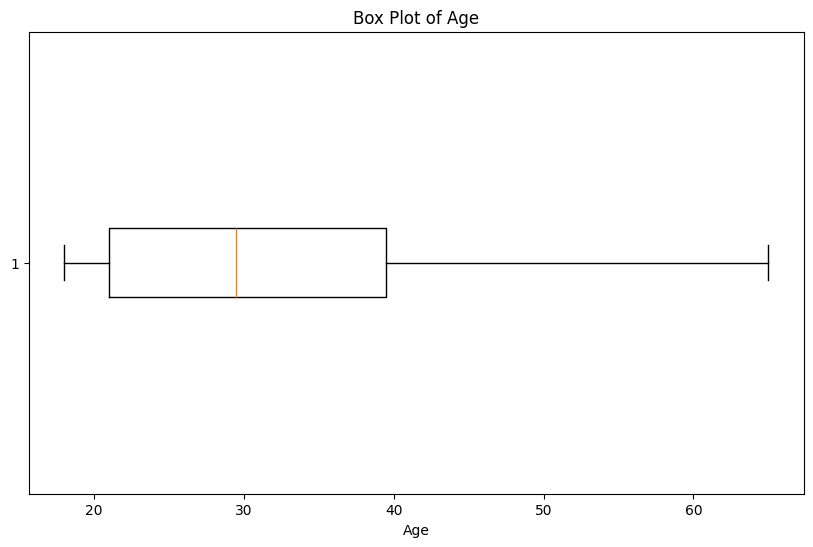

In [20]:
## Write your code here
conn = sqlite3.connect('survey-data.sqlite')

QUERY = """
SELECT Age from main
WHERE Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

import numpy as np
# Map the age to midpoint of range
age_mapping = {'Under 18 years old': 18,
               '18-24 years old': (18+24)/2,
               '25-34 years old': (25+34)/2,
               '35-44 years old': (35+44)/2,
               '45-54 years old': (45+54)/2,
               '55-64 years old': (55+64)/2,
               '65 years or older': 65,
               'Prefer not to say': np.nan  # Can drop or impute
               }

df["Age_mapped"] = df["Age"].map(age_mapping)
# Drop NULL values
df = df.dropna(subset=['Age_mapped'])

# Plot Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Age_mapped'], vert=False)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Close the connection
conn.close()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


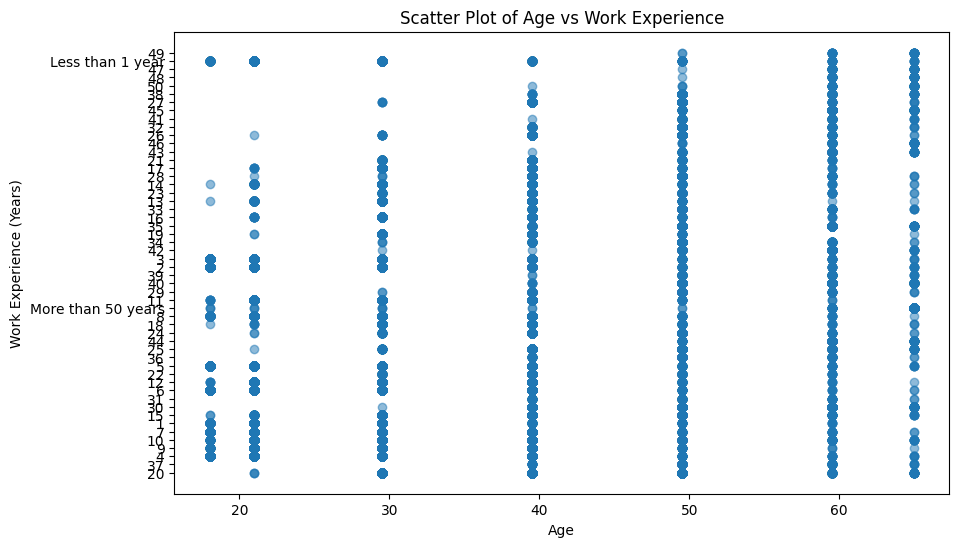

In [24]:
## Write your code here
conn = sqlite3.connect('survey-data.sqlite')
QUERY = """
SELECT Age, YearsCode as WorkExperience
FROM main
WHERE Age IS NOT NULL AND WorkExperience IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn) 

c


# Plot Scatter Plot
plt.figure(figsize=(10, 6)) 
plt.scatter(df['Age'], df['WorkExperience'], alpha=0.5)
plt.title('Scatter Plot of Age vs Work Experience') 
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')   
plt.show()



**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


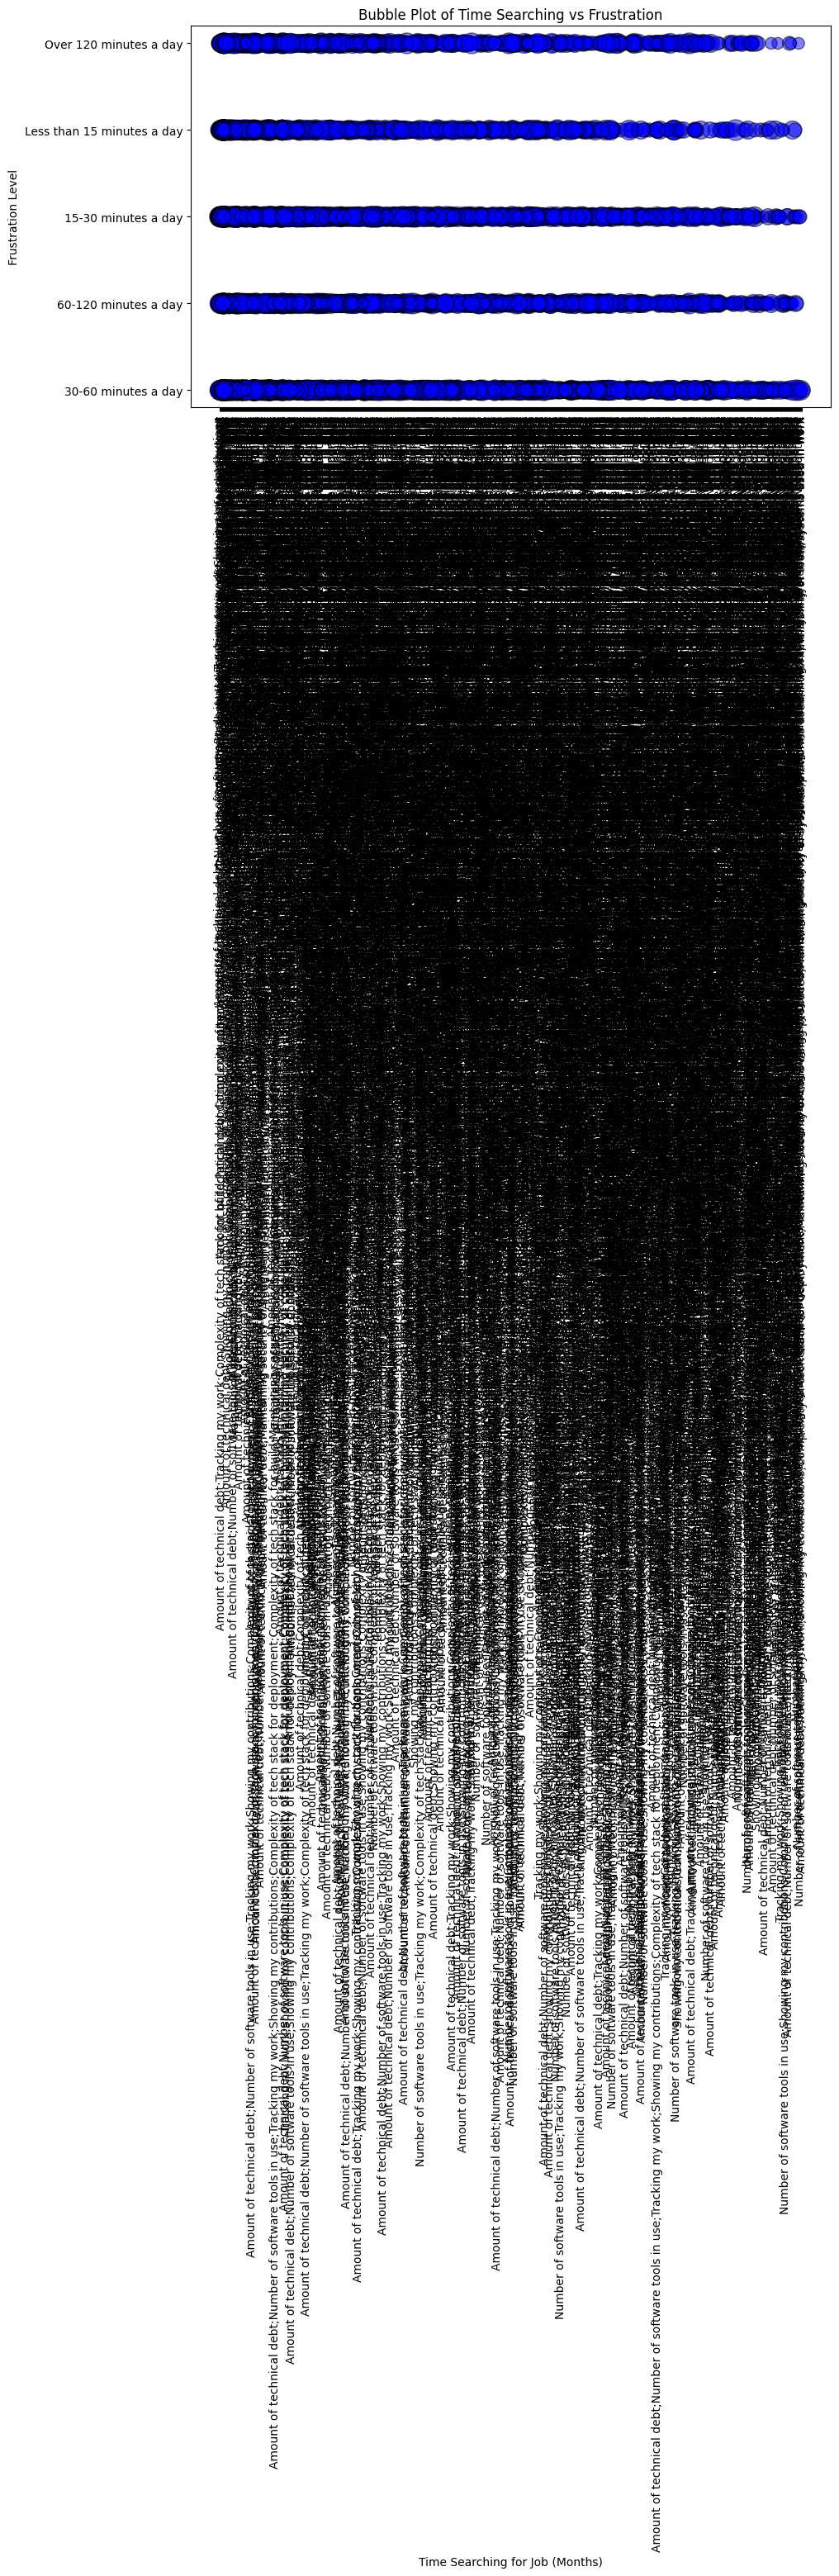

In [29]:
## Write your code here
QUERY = """
SELECT Age,TimeSearching, Frustration 
FROM main
WHERE TimeSearching IS NOT NULL AND Frustration IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

import numpy as np
# Map the age to midpoint of range
age_mapping = {'Under 18 years old': 18,
               '18-24 years old': (18+24)/2,
               '25-34 years old': (25+34)/2,
               '35-44 years old': (35+44)/2,
               '45-54 years old': (45+54)/2,
               '55-64 years old': (55+64)/2,
               '65 years or older': 65,
               'Prefer not to say': np.nan  # Can drop or impute
               }

df["Age"] = df["Age"].map(age_mapping)
# Drop NULL values
df = df.dropna(subset=['Age'])

# Plot Bubble Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Frustration'], df['TimeSearching'], 
            s=df['Age']*5,  # Bubble size based on Frustration
            alpha=0.5, color='blue', edgecolors='black')
plt.title('Bubble Plot of Time Searching vs Frustration')
plt.xlabel('Time Searching for Job (Months)')
plt.ylabel('Frustration Level')
plt.xticks(rotation=90)
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


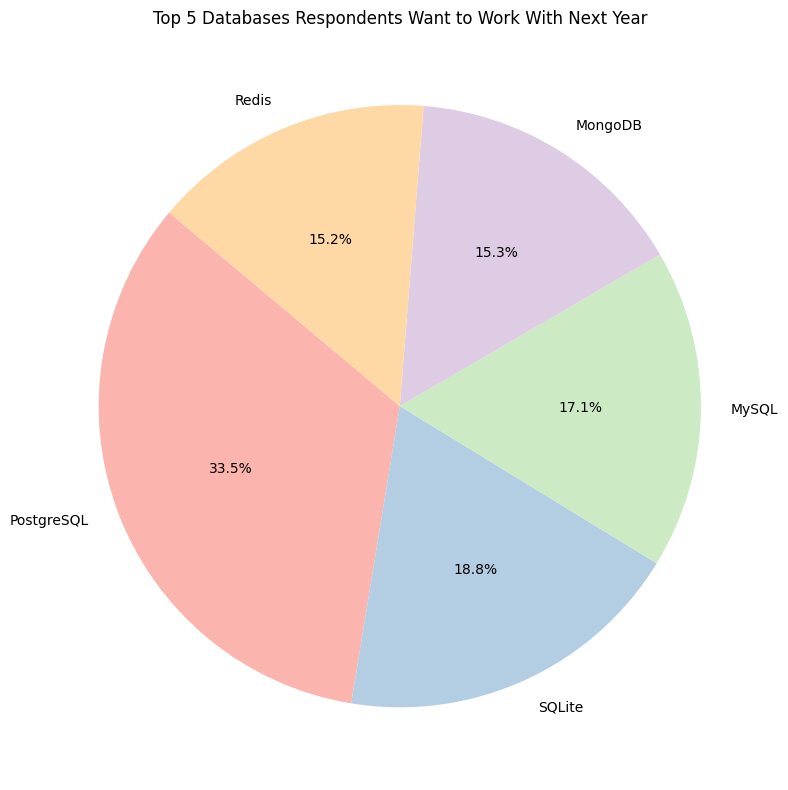

In [31]:
## Write your code here

QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
""" 

df = pd.read_sql_query(QUERY, conn)

# --- Step 1: Drop missing values ---
#df_filtered = df['DatabaseWantToWorkWith'].dropna()

# --- Step 2: Split each string on ';' and flatten into one column ---
all_databases = df['DatabaseWantToWorkWith'].str.split(';')
database_list = all_databases.explode().str.strip()

# --- Step 3: Count frequencies and get top 5 ---
top_databases = database_list.value_counts().nlargest(5)

# --- Step 4: Plot pie chart ---
plt.figure(figsize=(8, 8))
plt.pie(
    top_databases.values,
    labels=top_databases.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Top 5 Databases Respondents Want to Work With Next Year')
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


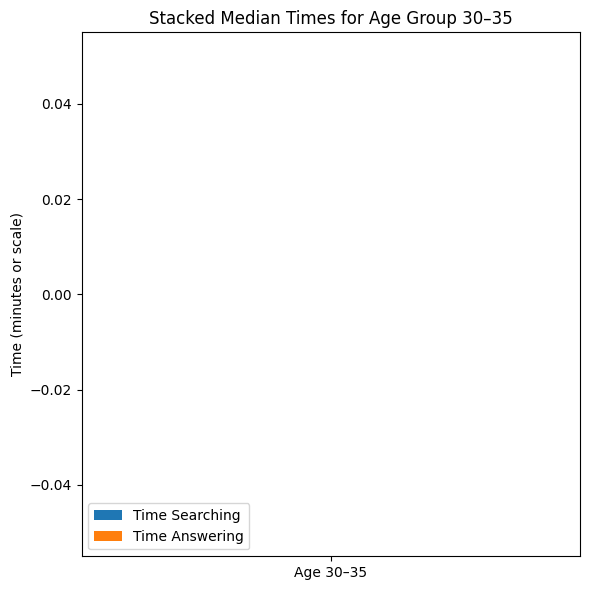

In [35]:
## Write your code here
QUERY = """
SELECT TimeSearching, TimeAnswering, Age
FROM main
WHERE TimeSearching IS NOT NULL AND TimeAnswering IS NOT NULL AND Age IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)


import numpy as np
# Map the age to midpoint of range
age_mapping = {'Under 18 years old': 18,
               '18-24 years old': (18+24)/2,
               '25-34 years old': (25+34)/2,
               '35-44 years old': (35+44)/2,
               '45-54 years old': (45+54)/2,
               '55-64 years old': (55+64)/2,
               '65 years or older': 65,
               'Prefer not to say': np.nan  # Can drop or impute
               }

df["Age"] = df["Age"].map(age_mapping)
# Drop NULL values
df = df.dropna(subset=['Age'])

# Step 2: Filter for age group ~30 to 35
df_age_30_35 = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Step 3: Convert TimeSearching and TimeAnswering to numeric
df_age_30_35['TimeSearching'] = pd.to_numeric(df_age_30_35['TimeSearching'], errors='coerce')
df_age_30_35['TimeAnswering'] = pd.to_numeric(df_age_30_35['TimeAnswering'], errors='coerce')

# Step 4: Calculate medians
median_searching = df_age_30_35['TimeSearching'].median()
median_answering = df_age_30_35['TimeAnswering'].median()

# Step 5: Plot stacked bar chart
plt.figure(figsize=(6, 6))
plt.bar('Age 30–35', median_searching, label='Time Searching')
plt.bar('Age 30–35', median_answering, bottom=median_searching, label='Time Answering')

plt.title('Stacked Median Times for Age Group 30–35')
plt.ylabel('Time (minutes or scale)')
plt.legend()
plt.tight_layout()
plt.show()



### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


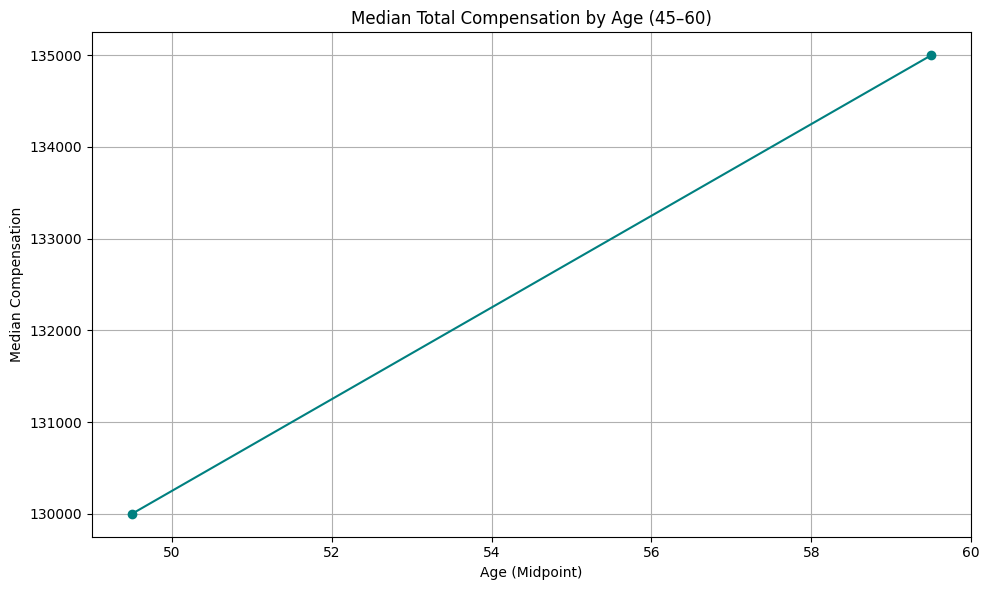

In [38]:
## Write your code here
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

import numpy as np
# Map the age to midpoint of range
age_mapping = {'Under 18 years old': 18,
               '18-24 years old': (18+24)/2,
               '25-34 years old': (25+34)/2,
               '35-44 years old': (35+44)/2,
               '45-54 years old': (45+54)/2,
               '55-64 years old': (55+64)/2,
               '65 years or older': 65,
               'Prefer not to say': np.nan  # Can drop or impute
               }

df["Age"] = df["Age"].map(age_mapping)
# Drop NULL values
df = df.dropna(subset=['Age'])

# Step 2: Ensure CompTotal is numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Step 3: Filter for Age 45–60
df_filtered = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Step 4: Group by Age and calculate median
median_comp = df_filtered.groupby('Age')['CompTotal'].median().reset_index()

# Step 5: Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp['Age'], median_comp['CompTotal'], marker='o', color='teal')
plt.title('Median Total Compensation by Age (45–60)')
plt.xlabel('Age (Midpoint)')
plt.ylabel('Median Compensation')
plt.grid(True)
plt.tight_layout()
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


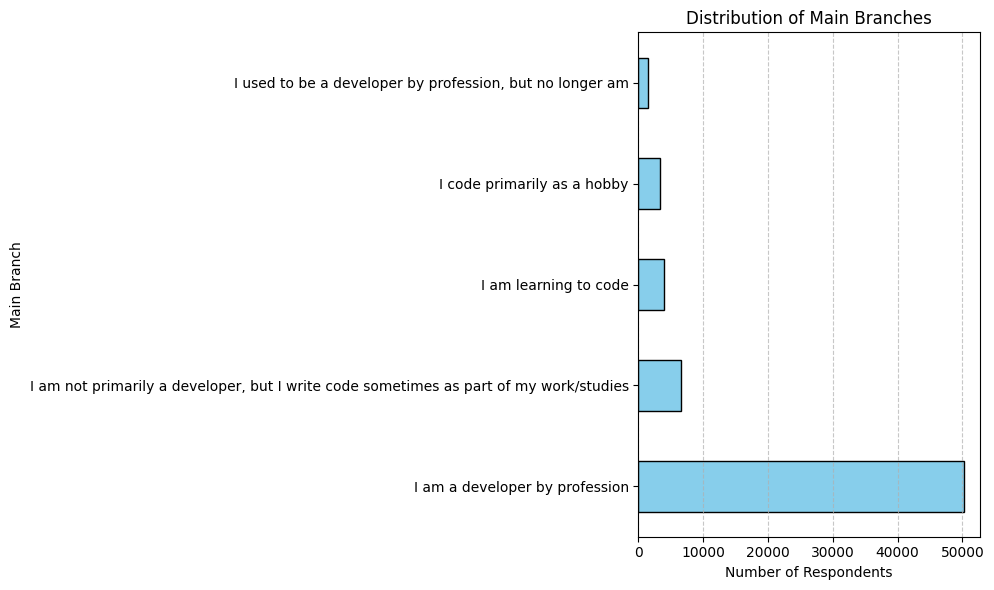

In [40]:
## Write your code here
QUERY = """
SELECT MainBranch
FROM main
WHERE MainBranch IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn) 

# Step 1: Count occurrences of each MainBranch
branch_counts = df['MainBranch'].value_counts() 
# Step 2: Create a horizontal bar chart
plt.figure(figsize=(10, 6)) 
branch_counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Distribution of Main Branches')  
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [41]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
